**Step 1: Synthetic Dataset Creation**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a synthetic Titanic dataset
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generating features
data = {
    "PassengerId": range(1, n_samples + 1),
    "Survived": np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]),
    "Pclass": np.random.choice([1, 2, 3], size=n_samples, p=[0.2, 0.2, 0.6]),
    "Sex": np.random.choice(["male", "female"], size=n_samples, p=[0.5, 0.5]),
    "Age": np.random.normal(30, 14, n_samples).clip(0, 80).round(1),
    "SibSp": np.random.poisson(1, n_samples),
    "Parch": np.random.poisson(0.5, n_samples),
    "Fare": np.random.normal(30, 20, n_samples).clip(0, 300).round(2),
    "Embarked": np.random.choice(["C", "Q", "S"], size=n_samples, p=[0.2, 0.1, 0.7])
}

# Creating a DataFrame
titanic_data = pd.DataFrame(data)

# Introducing some missing values for realism
for col in ["Age", "Fare", "Embarked"]:
    titanic_data.loc[titanic_data.sample(frac=0.1).index, col] = np.nan

# Save to CSV
titanic_data.to_csv("synthetic_titanic_data.csv", index=False)

# Load and display the dataset
print("Synthetic Titanic Dataset Sample:")
print(titanic_data.head())

# Upload the dataset to Colab
# To use this in Colab, upload the generated `synthetic_titanic_data.csv` manually

Synthetic Titanic Dataset Sample:
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked
0            1         0       1    male   NaN      0      1  21.11        S
1            2         1       3    male  38.6      0      0    NaN        Q
2            3         1       3  female  39.6      2      0  31.10        S
3            4         0       3    male  10.9      0      0    NaN        S
4            5         0       3    male  47.0      0      1  34.51        C


**Step 2: EDA and Data Cleaning**

Dataset Preview:
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked
0            1         0       1    male   NaN      0      1  21.11        S
1            2         1       3    male  38.6      0      0    NaN        Q
2            3         1       3  female  39.6      2      0  31.10        S
3            4         0       3    male  10.9      0      0    NaN        S
4            5         0       3    male  47.0      0      1  34.51        C

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            100
SibSp            0
Parch            0
Fare           100
Embarked       100
dtype: int64

Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<ipython-input-3-faac4d2d5c6d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-3-faac4d2d5c6d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

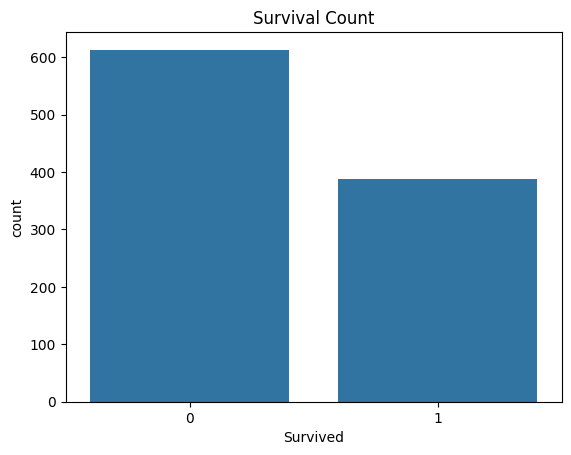

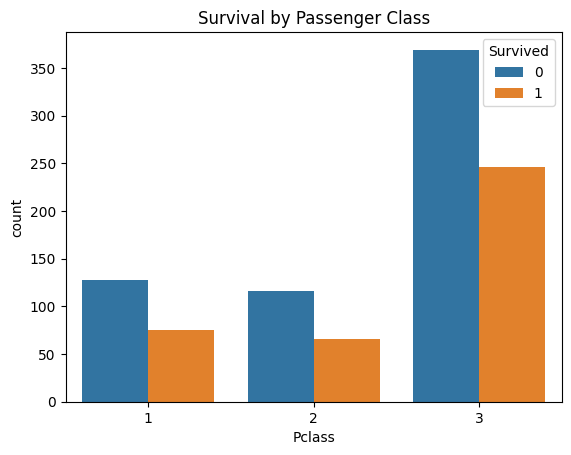

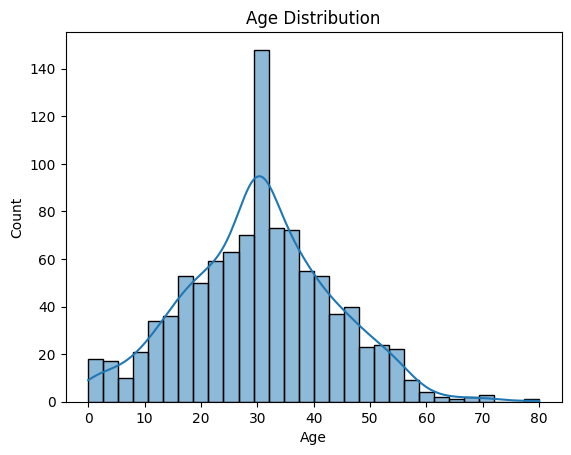

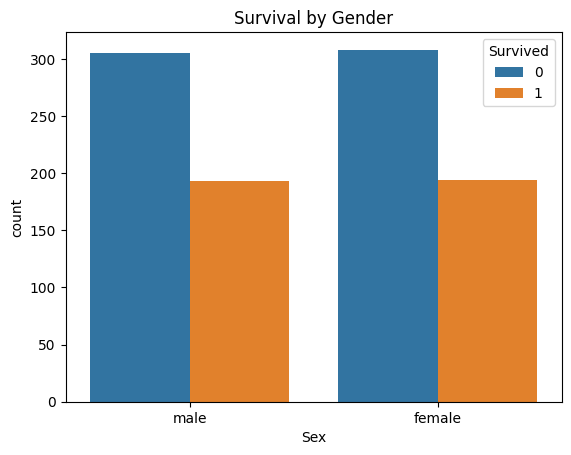

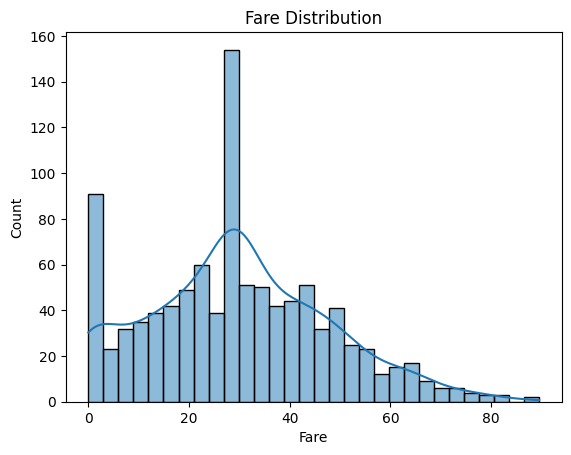

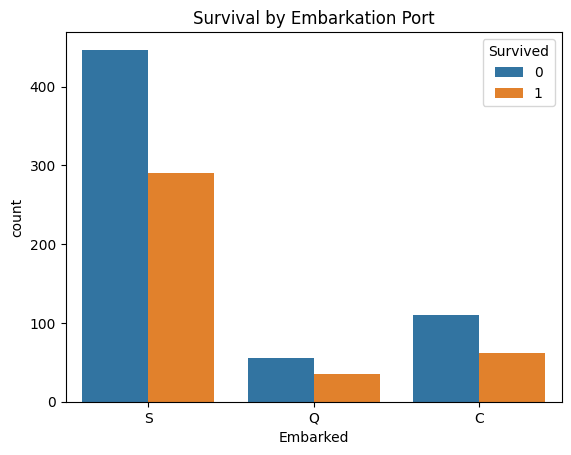

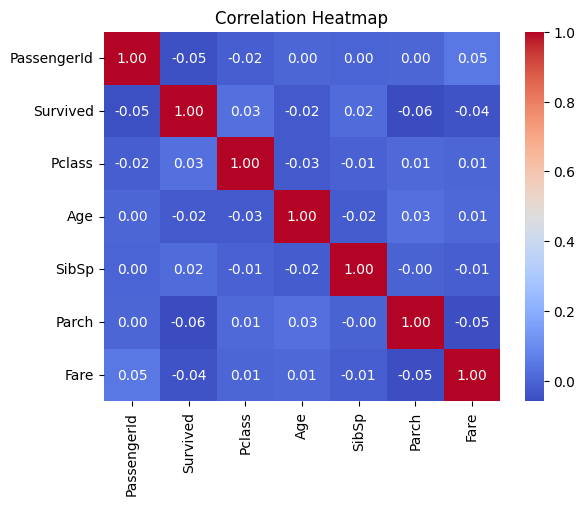


Summary Statistics:
       PassengerId     Survived       Pclass          Age        SibSp  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000     0.387000     2.412000    30.341800     0.974000   
std     288.819436     0.487307     0.805546    13.066005     0.959294   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%     250.750000     0.000000     2.000000    21.675000     0.000000   
50%     500.500000     0.000000     3.000000    30.250000     1.000000   
75%     750.250000     1.000000     3.000000    38.400000     2.000000   
max    1000.000000     1.000000     3.000000    80.000000     5.000000   

             Parch         Fare  
count  1000.000000  1000.000000  
mean      0.483000    29.735640  
std       0.685698    18.118118  
min       0.000000     0.000000  
25%       0.000000    16.935000  
50%       0.000000    29.085000  
75%       1.000000    41.785000  
max       3.000000    89.580000  


In [ ]:
# Load the dataset
df = pd.read_csv("synthetic_titanic_data.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Verifying no missing values remain
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Exploratory Data Analysis
# 1. Survival Rate
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

# 2. Survival Rate by Class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

# 3. Age Distribution
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# 4. Survival Rate by Gender
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

# 5. Fare Distribution
sns.histplot(df["Fare"], kde=True, bins=30)
plt.title("Fare Distribution")
plt.show()

# 6. Embarkation Port Analysis
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarkation Port")
plt.show()

# Correlation Heatmap
numeric_columns = df.select_dtypes(include=["float64", "int64"])  # Select numeric columns
correlation_matrix = numeric_columns.corr()  # Compute the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())